In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('intershipproject_modified.csv')

In [3]:
df

,eventId,eventName,eventTime,numberPlate,ownerName,speedLimit,speedDetected,ownerAge,location,vehicleRegistrationYear,ageOfVehicle,brandOfCar,maritalStatus
0,81999,Over Speed,16-06-2023 10.24,PB 26 WC 9915,Aaina,100,114,36,Rural,2010,14,Tata,Married
1,86613,No Helmet,23-08-2023 4.55,PB 26 WC 9915,Aaina,120,58,36,Rural,2010,14,Tata,Married
2,86085,Hit and Run,15-09-2023 13.44,PB 26 WC 9915,Aaina,100,71,36,Rural,2010,14,Tata,Married
3,69485,Driving Under the Influence (DUI),29-04-2023 13.55,AR 22 OF 9491,Aarna,100,43,50,Rural,2021,3,Tata,Single
4,13622,No Helmet,11-06-2023 20.17,AR 22 OF 9491,Aarna,100,82,50,Rural,2021,3,Tata,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3600,Hit and Run,20-10-2023 9.31,GJ 07 GQ 5406,Zaina,100,17,46,Rural,2017,7,Tata,Single
996,53649,Vehicle Moving in Marked Area,21-01-2024 13.22,GJ 07 GQ 5406,Zaina,50,31,46,Rural,2017,7,Tata,Single
997,57180,Wrong Way Detection,31-01-2024 23.15,GJ 07 GQ 5406,Zaina,100,53,46,Rural,2017,7,Tata,Single
998,45258,Triple Ride,23-08-2023 18.25,AN 01 TX 3968,Zara,50,49,33,Urban,2021,3,Hyundai,Single


In [4]:
df.shape

(1000, 13)

In [5]:
df.columns

Index(['eventId', 'eventName', 'eventTime', 'numberPlate', 'ownerName',
       'speedLimit', 'speedDetected', 'ownerAge', 'location',
       'vehicleRegistrationYear', 'ageOfVehicle', 'brandOfCar',
       'maritalStatus'],
      dtype='object')

# Data cleaning

In [6]:
df.isnull().sum()

eventId                    0
eventName                  0
eventTime                  0
numberPlate                0
ownerName                  0
speedLimit                 0
speedDetected              0
ownerAge                   0
location                   0
vehicleRegistrationYear    0
ageOfVehicle               0
brandOfCar                 0
maritalStatus              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   eventId                  1000 non-null   int64 
 1   eventName                1000 non-null   object
 2   eventTime                1000 non-null   object
 3   numberPlate              1000 non-null   object
 4   ownerName                1000 non-null   object
 5   speedLimit               1000 non-null   int64 
 6   speedDetected            1000 non-null   int64 
 7   ownerAge                 1000 non-null   int64 
 8   location                 1000 non-null   object
 9   vehicleRegistrationYear  1000 non-null   int64 
 10  ageOfVehicle             1000 non-null   int64 
 11  brandOfCar               1000 non-null   object
 12  maritalStatus            1000 non-null   object
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


In [9]:
severity_points = {
    'Wrong Way Detection': 700,
    'Red Light Violation Detection': 500,
    'Hit and Run': 1000,
    'Wrong Licence Plate': 300,
    'Reckless Driving': 800,
    'Driving Under the Influence (DUI)': 900,
    'Triple Ride': 600,
    'Not Wearing Seat Belts': 200,
    'Over Speed': 400,
    'No Helmet': 250,
    'Vehicle Crossing Zebra Line': 350,
    'Vehicle Moving in Marked Area': 450
}


df['severityPoints'] = df['eventName'].map(severity_points)

df['totalViolations'] = df.groupby('numberPlate')['eventId'].transform('count')

def classify_violation_level(points):
    if points >= 800:
        return 'high'
    elif points >= 300:
        return 'medium'
    else:
        return 'low'

df['violationLevel'] = df['severityPoints'].apply(classify_violation_level)

In [10]:
df.head(5)

,eventId,eventName,eventTime,numberPlate,ownerName,speedLimit,speedDetected,ownerAge,location,vehicleRegistrationYear,ageOfVehicle,brandOfCar,maritalStatus,severityPoints,totalViolations,violationLevel
0,81999,Over Speed,16-06-2023 10.24,PB 26 WC 9915,Aaina,100,114,36,Rural,2010,14,Tata,Married,400,3,medium
1,86613,No Helmet,23-08-2023 4.55,PB 26 WC 9915,Aaina,120,58,36,Rural,2010,14,Tata,Married,250,3,low
2,86085,Hit and Run,15-09-2023 13.44,PB 26 WC 9915,Aaina,100,71,36,Rural,2010,14,Tata,Married,1000,3,high
3,69485,Driving Under the Influence (DUI),29-04-2023 13.55,AR 22 OF 9491,Aarna,100,43,50,Rural,2021,3,Tata,Single,900,2,high
4,13622,No Helmet,11-06-2023 20.17,AR 22 OF 9491,Aarna,100,82,50,Rural,2021,3,Tata,Single,250,2,low


# EDA

In [11]:
df.describe()

,eventId,speedLimit,speedDetected,ownerAge,vehicleRegistrationYear,ageOfVehicle,severityPoints,totalViolations
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49921.341000,87.290000,53.528000,39.063000,2016.028000,7.972000,540.900000,5.016000
std,28789.364626,25.640072,33.877203,9.699129,3.624963,3.624963,257.883101,1.803052
min,307.000000,50.000000,10.000000,23.000000,2010.000000,2.000000,200.000000,1.000000
25%,25487.250000,80.000000,26.000000,30.000000,2013.000000,5.000000,300.000000,4.000000
50%,49943.000000,80.000000,45.000000,38.000000,2016.000000,8.000000,500.000000,5.000000
75%,74779.750000,100.000000,75.000000,48.000000,2019.000000,11.000000,800.000000,6.000000
max,99998.000000,120.000000,159.000000,55.000000,2022.000000,14.000000,1000.000000,9.000000


In [12]:
df['eventName'].unique()

array(['Over Speed', 'No Helmet', 'Hit and Run',
       'Driving Under the Influence (DUI)', 'Not Wearing Seat Belts',
       'Wrong Way Detection', 'Red Light Violation Detection',
       'Triple Ride', 'Vehicle Crossing Zebra Line',
       'Wrong Licence Plate', 'Vehicle Moving in Marked Area',
       'Reckless Driving'], dtype=object)


Box plots for numerical features:


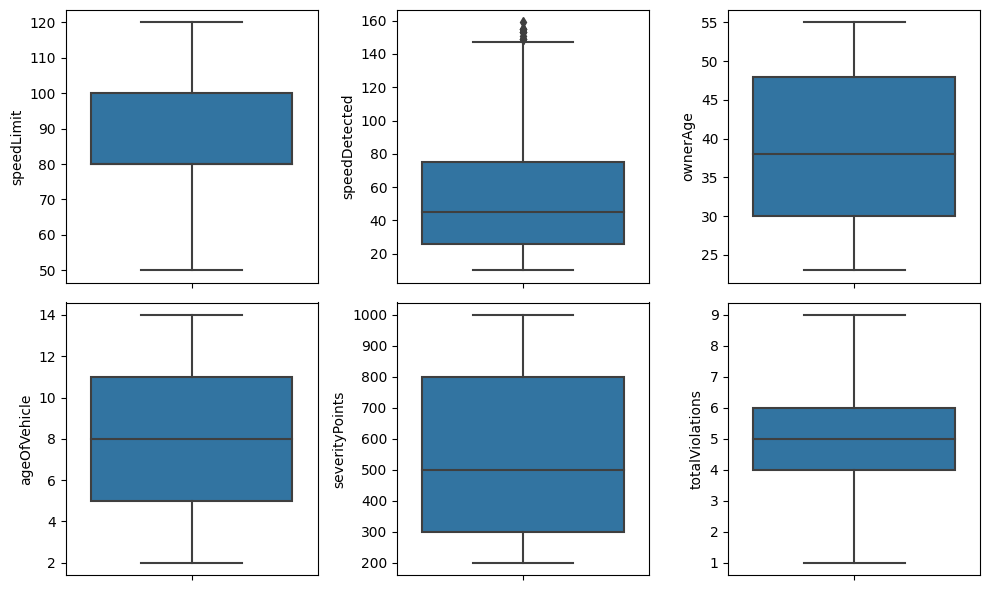

In [13]:
numerical_features = ['speedLimit', 'speedDetected', 'ownerAge', 'ageOfVehicle','severityPoints','totalViolations']
print("\nBox plots for numerical features:")
plt.figure(figsize=(10,6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=feature)
plt.tight_layout()
plt.show()

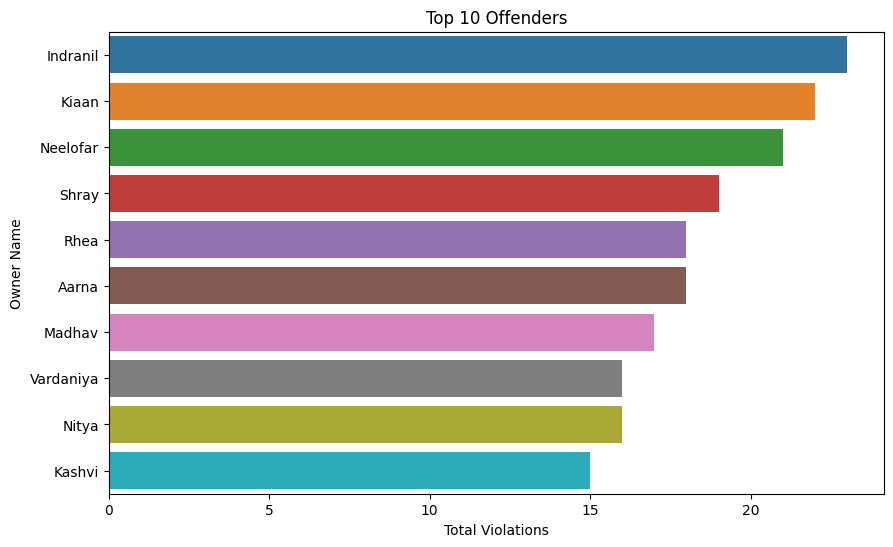

In [14]:
owner_violations = df.groupby('ownerName').size().reset_index(name='totalViolationsByOwner')
top_offenders = owner_violations.sort_values(by='totalViolationsByOwner', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='totalViolationsByOwner', y='ownerName', data=top_offenders)
plt.title('Top 10 Offenders')
plt.xlabel('Total Violations')
plt.ylabel('Owner Name')
plt.show()

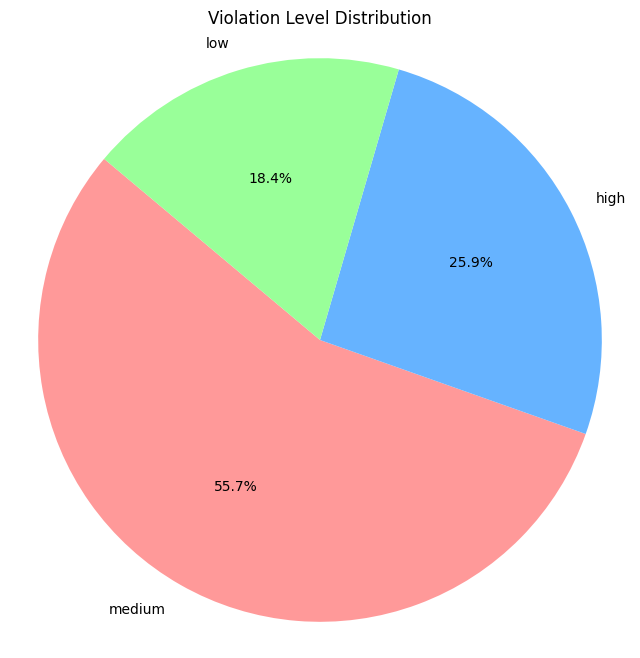

In [15]:
violation_counts = df['violationLevel'].value_counts()
labels = violation_counts.index
sizes = violation_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Violation Level Distribution')
plt.axis('equal')  
plt.show()

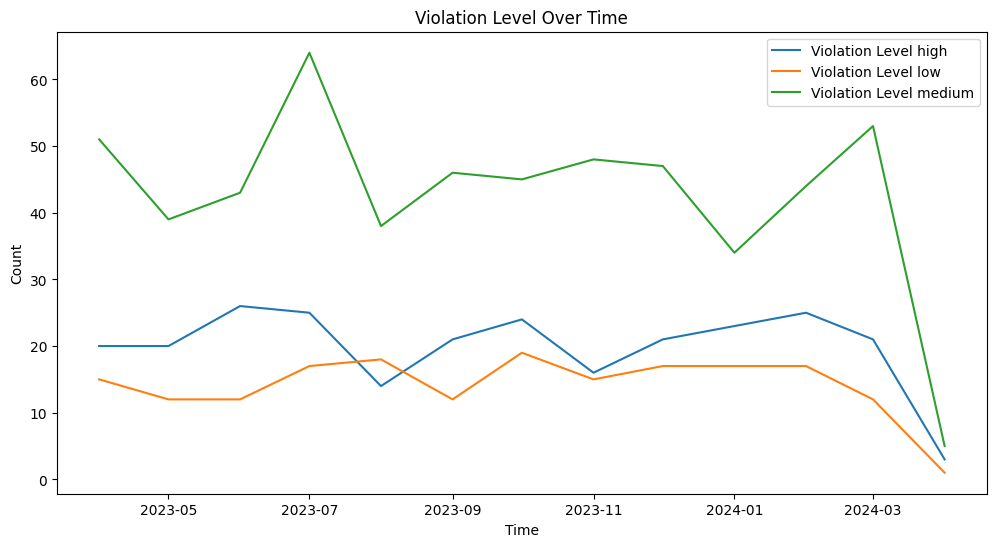

In [16]:
if 'eventTime' in df.columns:
    df['eventTime'] = pd.to_datetime(df['eventTime'], format='%d-%m-%Y %H.%M')
    violation_over_time = df.groupby(df['eventTime'].dt.to_period('M'))['violationLevel'].value_counts().unstack().fillna(0)
    plt.figure(figsize=(12, 6))
    for column in violation_over_time.columns:
        plt.plot(violation_over_time.index.to_timestamp(), violation_over_time[column], label=f'Violation Level {column}')
    plt.title('Violation Level Over Time')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
else:
    print("The 'eventTime' column does not exist in the dataset.")


Count plots for categorical features:


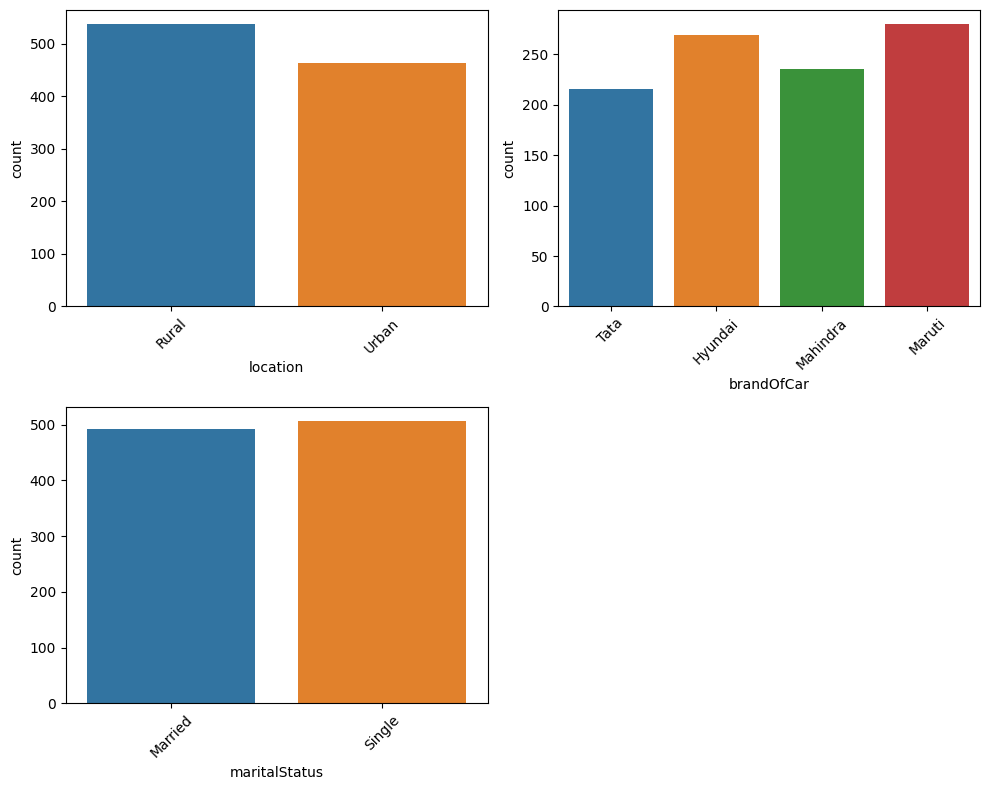

In [17]:
print("\nCount plots for categorical features:")
categorical_features = ['location', 'brandOfCar', 'maritalStatus']
plt.figure(figsize=(10, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

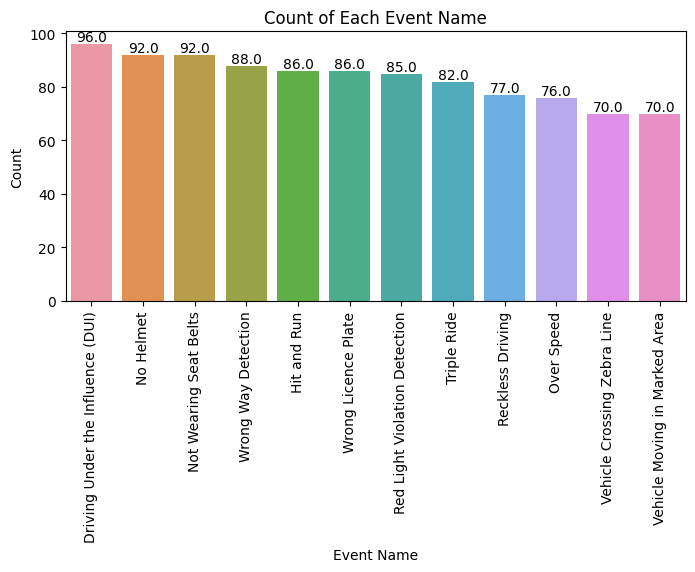

In [21]:
plt.figure(figsize=(8,3.5))
ax = sns.countplot(data=df, x='eventName', order=df['eventName'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Each Event Name')
plt.xlabel('Event Name')
plt.ylabel('Count')

# Add counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()